### **모델**

In [16]:
import tensorflow as tf
import os

def download_model(model_type):
    server_prefix = 'https://omnomnom.vision.rwth-aachen.de/data/metrabs'
    model_zippath = tf.keras.utils.get_file(
        origin=f'{server_prefix}/{model_type}_20211019.zip',
        extract=True, cache_subdir='models')
    model_path = os.path.join(os.path.dirname(model_zippath), model_type)
    return model_path

model = tf.saved_model.load(download_model('metrabs_mob3l_y4t')) # or metrabs_eff2l_y4 for the big model
! wget -q https://raw.githubusercontent.com/isarandi/metrabs/master/img/test_image_3dpw.jpg


'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


### **이미지 로드**

In [17]:
import cv2
image = cv2.imread('C:/Users/Leeyourack/jookyoung/image/1.test_image/peo3.jpg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

ROI_image = cv2.imread('C:/Users/Leeyourack/jookyoung/image/0.ROI_image/pre_image_final.jpg')
ROI_image = cv2.cvtColor(ROI_image, cv2.COLOR_BGR2RGB)


### **예측(이미지 모델 대입)**

In [18]:
pred = model.detect_poses(image, skeleton='smpl_24')

In [63]:
#
foot_xy = pred['poses2d'].numpy()[:,23]
foot_xy

array([[516.862  , 361.7298 ],
       [351.82016, 350.97308],
       [524.7533 , 323.80365]], dtype=float32)

In [19]:
#
import numpy as np
M1=np.array([[ 1.45097602e-01, -5.41867598e-01,  3.12288400e+02],
       [ 2.15106760e-01,  5.04711845e-01, -1.13262800e+02],
       [ 3.66469646e-05, -1.34106205e-03,  1.00000000e+00]])

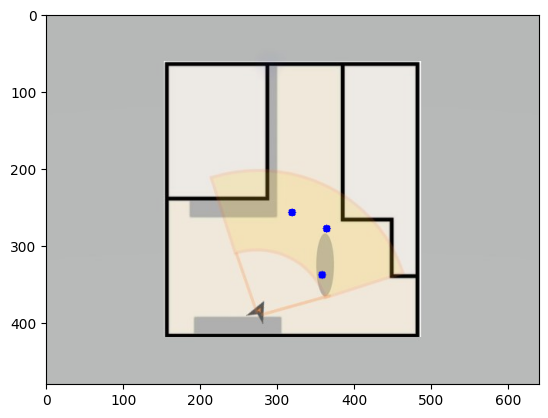

In [75]:
#
from matplotlib import pyplot as plt
for i, xy in enumerate(foot_xy):
    trans_foot = M1@(xy[0], xy[1], 1)
    trans_foot = trans_foot/trans_foot[2]
    trans_x = trans_foot[0]
    trans_y = trans_foot[1]
    
    mapping_image= cv2.circle(ROI_image,(int(trans_x),int(trans_y)),5,(0,0,255),-1)
    
plt.imshow(mapping_image)

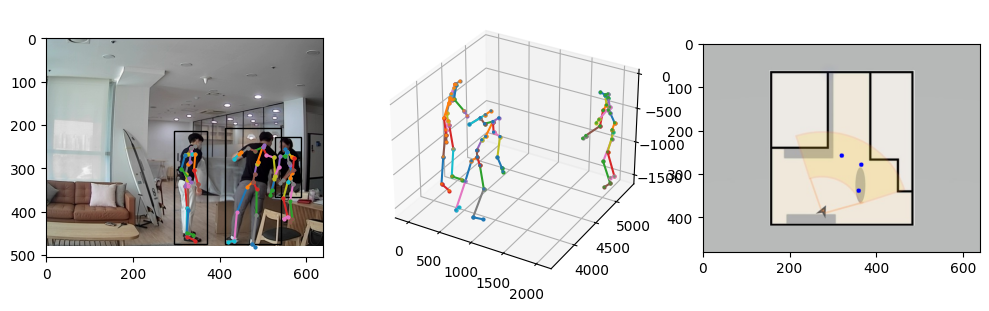

: 

In [21]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.mplot3d import Axes3D
import cv2

def visualize(im, detections, poses3d, poses2d, edges):
    fig = plt.figure(figsize=(10, 5.2))
    image_ax = fig.add_subplot(1, 3, 1)
    image_ax.imshow(image)
    for x, y, w, h in detections[:, :4]:
        image_ax.add_patch(Rectangle((x, y), w, h, fill=False))

    pose_ax = fig.add_subplot(1, 3, 2, projection='3d')
    '''pose_ax.view_init(5, -85)
    pose_ax.set_xlim3d(-1500, 1500) 
    pose_ax.set_zlim3d(-500, 1500)
    pose_ax.set_ylim3d(0, 3000)'''


    #------------------------------------------------------------------------------------------------------
    #2Dmapping
    
    foot_xy = pred['poses2d'].numpy()[:,23]
    
    for i, xy in enumerate(foot_xy):
        trans_foot = M1@(xy[0], xy[1], 1)
        trans_foot = trans_foot/trans_foot[2]
        trans_x = trans_foot[0]
        trans_y = trans_foot[1]
        
        mapping_image= cv2.circle(ROI_image,(int(trans_x),int(trans_y)),5,(0,0,255),-1)

    foot = fig.add_subplot(1, 3, 3)
    foot.imshow(mapping_image)
    
    #------------------------------------------------------------------------------------------------------
    
    
    # Matplotlib plots the Z axis as vertical, but our poses have Y as the vertical axis.
    # Therefore, we do a 90° rotation around the X axis:
    poses3d[..., 1], poses3d[..., 2] = poses3d[..., 2], -poses3d[..., 1]
    for pose3d, pose2d in zip(poses3d, poses2d):
        for i_start, i_end in edges:
            image_ax.plot(*zip(pose2d[i_start], pose2d[i_end]), marker='o', markersize=2)
            pose_ax.plot(*zip(pose3d[i_start], pose3d[i_end]), marker='o', markersize=2)
        image_ax.scatter(*pose2d.T, s=2)
        pose_ax.scatter(*pose3d.T, s=2)

    fig.tight_layout()
    plt.show()

visualize(
    image, 
    pred['boxes'].numpy(),
    pred['poses3d'].numpy(),
    pred['poses2d'].numpy(),
    model.per_skeleton_joint_edges['smpl_24'].numpy())

In [ ]:
import cv2 
import numpy as np